In [1]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [2]:
include("thicweed_lib.jl")

filename = "synth_300.fa"

glob = Params(0.0, 0, 0.0, 0.0, 0, 0, 0,true,true,true,false,0.2)    
glob.randlim = 0.2
glob.minclustsize= 20
glob.infthres = -1.0
glob.pscount = 0.5
glob.maxnclust = 25
glob.maxsplitclusters = 100
glob.use_revcomp = true
glob.use_shift = true
glob.debug = false
glob.wlength = -1
glob.hardmask = false
glob.clthres = 0.4

fseqs = readfasta(filename,glob)

seqs = [s::String for (h,s) in fseqs]::Array{String,1};

if glob.wlength < 0
    if glob.use_shift
        ls = Int64[length(s) for s in seqs]
        sort!(ls)
        glob.wlength = div(ls[div(length(ls),2)],3)::Int64
    else
        glob.wlength = maximum([length(s) for s in seqs])
    end
end

33

In [3]:
clusterSequences(seqs, glob)

1 clusters... 3 clusters... 
Final reassigning among all clusters... Done.


3-element Array{SeqCluster,1}:
 SeqCluster(Seq[Seq(['C', 'G', 'C', 'A', 'C', 'G', 'T', 'A', 'C', 'A'  …  'G', 'C', 'G', 'T', 'C', 'C', 'A', 'A', 'G', 'G'], [1, 2, 1, 0, 1, 2, 3, 0, 1, 0  …  2, 1, 2, 3, 1, 1, 0, 0, 2, 2], 100, 131, 0, 25, false, 25, false, [25, 57, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[false, false, false, false, false, false, false, false, false, false  …  false, false, false, false, false, false, false, false, false, false]), Seq(['G', 'C', 'C', 'A', 'G', 'A', 'G', 'C', 'T', 'C'  …  'A', 'C', 'T', 'A', 'C', 'C', 'C', 'C', 'C', 'C'], [2, 1, 1, 0, 2, 0, 2, 1, 3, 1  …  0, 1, 3, 0, 1, 1, 1, 1, 1, 1], 100, 118, 0, 15, true, 15, true, [76, 60, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[true, false, false, false, false, false, false, false, false, false  …  false, false, false, false, false, false, false, false, false, false]), Seq(['C', 'T', 'A', 'T', 'A', 'A', 'G', 'T', 'A', 'T'  …  'T', 'G', 'A', 'T', 'G', 'A', 'G', 'A', 'A', '

In [8]:
@everywhere using ProfileView

In [9]:
Profile.clear()

In [10]:
@profile clusterSequences(seqs, glob)

1 clusters... 3 clusters... 
Final reassigning among all clusters... Done.


4-element Array{SeqCluster,1}:
 SeqCluster(Seq[Seq(['C', 'C', 'T', 'G', 'T', 'A', 'G', 'A', 'G', 'C'  …  'A', 'C', 'G', 'A', 'C', 'C', 'T', 'G', 'T', 'A'], [1, 1, 3, 2, 3, 0, 2, 0, 2, 1  …  0, 1, 2, 0, 1, 1, 3, 2, 3, 0], 100, 150, 0, -3, true, -3, true, [-3, 64, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[true, false, false, false, false, false, false, false, false, false  …  false, false, false, false, false, false, false, false, false, false]), Seq(['C', 'A', 'T', 'T', 'C', 'A', 'T', 'T', 'C', 'A'  …  'A', 'C', 'G', 'T', 'A', 'C', 'G', 'C', 'T', 'G'], [1, 0, 3, 3, 1, 0, 3, 3, 1, 0  …  0, 1, 2, 3, 0, 1, 2, 1, 3, 2], 100, 34, 0, -8, false, -8, false, [-8, -8, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Bool[false, true, false, false, false, false, false, false, false, false  …  false, false, false, false, false, false, false, false, false, false]), Seq(['G', 'T', 'C', 'C', 'T', 'C', 'G', 'T', 'C', 'C'  …  'C', 'A', 'G', 'G', 'C', 'A', 'G', 'T', 'T', 'T'

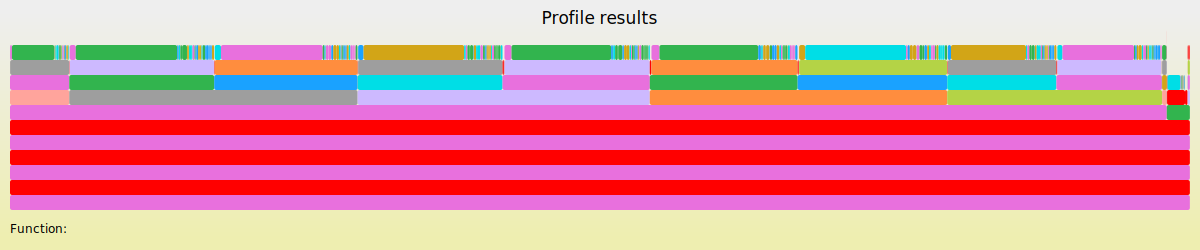

In [11]:
ProfileView.view()